<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m08/project/Clustering_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline
# plt.style.use('seaborn')

### Get Data

In [2]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(15)

,sepal length,sepal width,petal length,petal width,target
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor


In [3]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
145           6.7          3.0           5.2          2.3
74            6.4          2.9           4.3          1.3
80            5.5          2.4           3.8          1.1
41            4.5          2.3           1.3          0.3
23            5.1          3.3           1.7          0.5

 Target 

77     Iris-versicolor
138     Iris-virginica
64     Iris-versicolor
28         Iris-setosa
143     Iris-virginica
Name: target, dtype: object


### Visualize Data

In [4]:

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

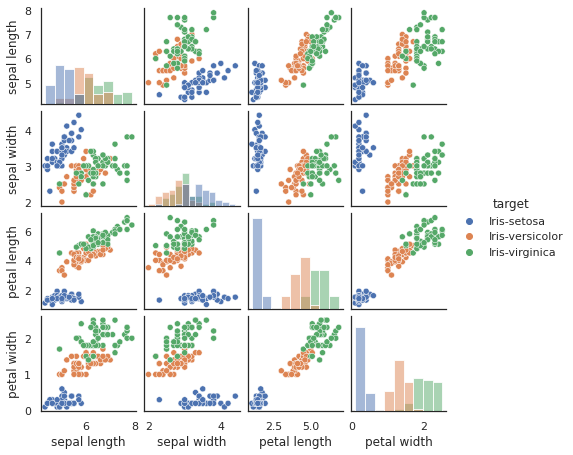

In [5]:


sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!! 

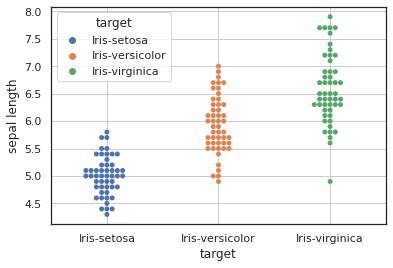

In [6]:
sns.swarmplot(x="target", y="sepal length", data=data, hue="target")
plt.grid()


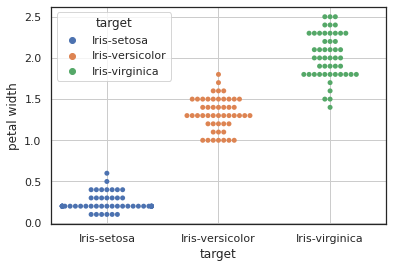

In [7]:
sns.swarmplot(x="target", y="petal width", data=data, hue="target")
plt.grid()

### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, 
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

# Celda para completar código

In [8]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS




X_scaled_array = scaler.fit_transform(X)
print(f"Dataset escalado y trransformado en un {type(X_scaled_array)}")






#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

Dataset escalado y trransformado en un <class 'numpy.ndarray'>


,sepal length,sepal width,petal length,petal width
84,-0.537178,-0.124958,0.421564,0.396172
19,-0.900681,1.726266,-1.284407,-1.181504
106,-1.143017,-1.281972,0.421564,0.659118
12,-1.264185,-0.124958,-1.341272,-1.444450
91,0.310998,-0.124958,0.478430,0.264699
27,-0.779513,1.032057,-1.284407,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
94,-0.294842,-0.819166,0.250967,0.133226
137,0.674501,0.106445,0.990221,0.790591
63,0.310998,-0.356361,0.535296,0.264699


### Silhouette score & Elbow Method

un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

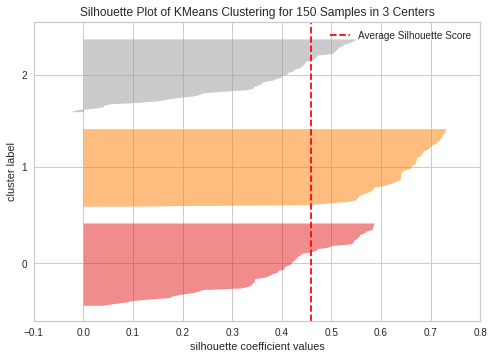

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


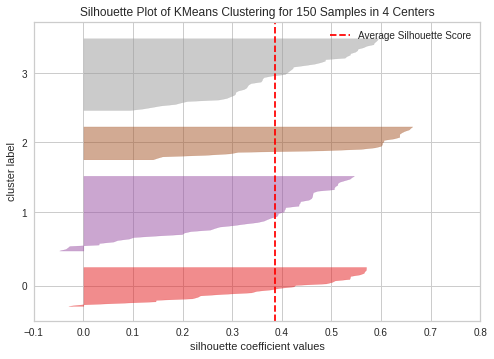

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

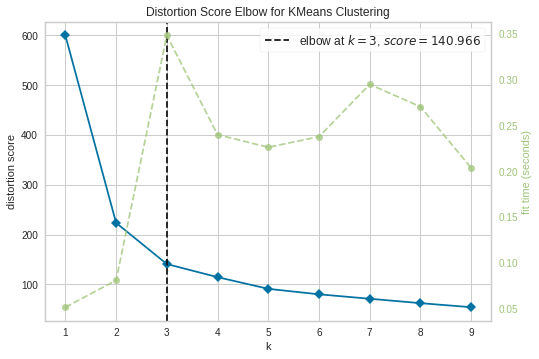

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos 
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos 
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

# Celda para completar código

In [12]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.

km = KMeans(init = 'k-means++'
            , n_clusters=nclusters
            , max_iter=500
            , n_init=10
            , random_state=seed)

km.fit(X_scaled)


#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.



# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)





print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características). 
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

# Celda para completar código

In [13]:

from sklearn.decomposition import PCA

ndimensions = 2


#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimension


pca = PCA(n_components=ndimensions)  
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)


#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimension

X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 


print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
146               1.558492              -0.905314
21               -2.204645               0.952457
58                0.926222               0.030331
118               3.309141              -0.002361
4                -2.388777               0.674767
75                0.873537               0.250709
62                0.551634              -1.772582
70                0.738256               0.402470
126               1.171905              -0.318897
24               -2.228217               0.162186


 explained_variance
[0.72770452 0.23030523]


Tenemosnuevas coordenadas 2D para cada punto de datos. 
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un 
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que 
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones. 



In [14]:

finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
32,-2.608203,1.828475,Iris-setosa,1
64,-0.037258,-0.432795,Iris-versicolor,0
87,1.035878,-1.392466,Iris-versicolor,0
128,1.786009,-0.193273,Iris-virginica,2
121,0.973915,-0.571174,Iris-virginica,0
45,-2.075358,-0.691917,Iris-setosa,1
19,-2.339949,1.158033,Iris-setosa,1
85,0.431783,0.855137,Iris-versicolor,2
62,0.551634,-1.772582,Iris-versicolor,0
90,0.272335,-1.119442,Iris-versicolor,0


### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

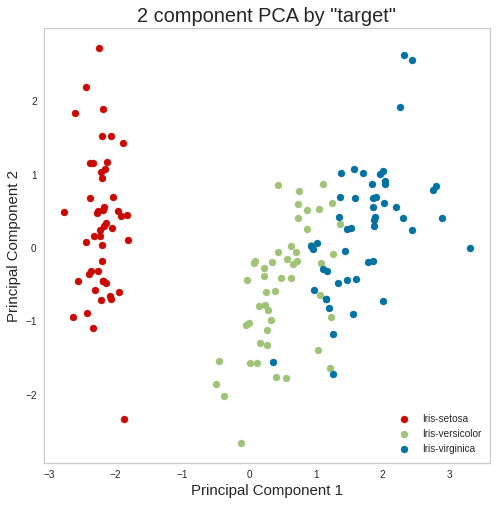

In [15]:
def plot_PCA(targets, column):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title(f'2 component PCA by "{column}"', fontsize = 20)
  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf[column] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
  ax.legend(targets)
  ax.grid()

plot_PCA(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], "target")

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

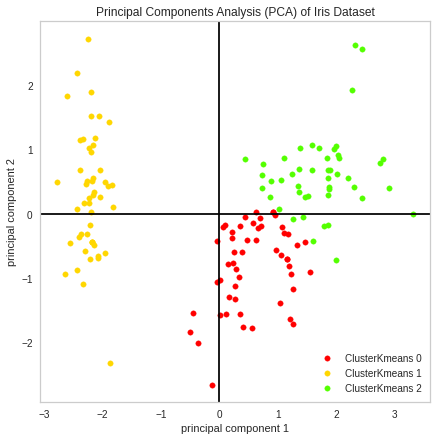

In [16]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

## Introduzca una conclusión de los resultados obtenidos

En el supuesto de que el dataset nos hubiera venido sin etiquetar, hubieramos podido extraer la siguiente información.



*   Podemos clasifica las muestras en tres clases de flores, gracias a la  información que nos dan los métodos **elbow** y de las **siluetas**.
*   Podemos asignar a qué clase se corresponde cada una de las muestras, gracias a la aplicación del algoritmo **KMeans**

Además, gracias al análisis que hemos hecho mediante **PCA** vemos que el "agrupamiento" que realiza *KMeans* es muy parecido al etiquetado hecho mediante humanos del dataset.

Ahora cabe preguntarse tres cosas

* ¿Cuánto de parecida es la agrupación con el etiquetado?
* ¿Mejoraría el resultado empleando algún otro algoritmo de Clustering?
* ¿Pueden explicarse las diferencias entre "agrupación" y "etiquetado" por anomalías en los datos?


Para responder a la primera pregunta voy a calcular el **accuracy** y la **matriz de confusión**, como si hubieramos ajustado un clasificador.

In [17]:
# Mapeamos las etiquetas al cluster mayoritario entre sus muestras.
target_to_num_mapping_kmeans = finalDf.groupby("target").agg(pd.Series.mode).to_dict()['ClusterKmeans']
print("Target to numeric mapping (KMeans):", target_to_num_mapping_kmeans)

y_true_kmeans = y.map(target_to_num_mapping_kmeans).to_numpy()
print("y_true_kmeans:", y_true_kmeans[:30])

y_pred_kmeans = finalDf['ClusterKmeans'].to_numpy()
print("y_pred_kmeans:", y_pred_kmeans[:30])


Target to numeric mapping (KMeans): {'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}
y_true_kmeans: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_pred_kmeans: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Accuracy: 0.8333333333333334


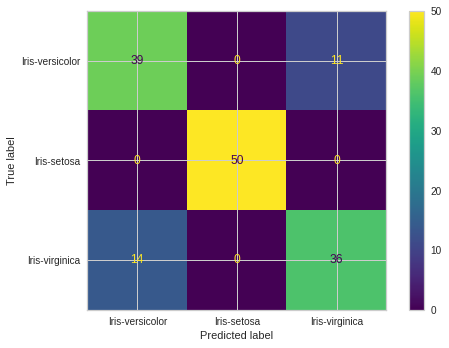

In [18]:
# Calculamos el accuracy y la matriz de confusión
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
labels_kmeans = [k for k,v in sorted(target_to_num_mapping_kmeans.items(), key=lambda x: x[1])]

print("Accuracy:", accuracy_score(y_true=y_true_kmeans, y_pred=y_pred_kmeans))

cm_kmeans = ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_true_kmeans, y_pred=y_pred_kmeans),
    display_labels=labels_kmeans
)
cm_kmeans.plot()
plt.show()

Aquí vemos que la agrupación que ha hecho KMeans coincide en un 83% con las etiquetas del dataset. 

La clase que ha agrupado mejor ha sido `Iris-setosa` mientras que ha agrupado de forma diferente algunas muestras de `Iris-versicolor` a `Iris-virginica` y viceversa.

Voy a probar con un **clustering jerárquico**.

Target to numeric mapping (Agglomerative Clustering): {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 0}
y_true_ag: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_pred_ag: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.8266666666666667


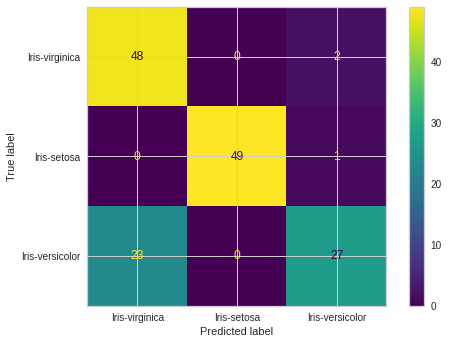

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)  
y_pred_ag = cluster.fit_predict(X_scaled)
finalDf["AgglomerativeClustering"] = y_pred_ag

target_to_num_mapping_ag = finalDf.groupby("target").agg(pd.Series.mode).to_dict()['AgglomerativeClustering']
print("Target to numeric mapping (Agglomerative Clustering):", target_to_num_mapping_ag)

y_true_ag = y.map(target_to_num_mapping_ag).to_numpy()
print("y_true_ag:", y_true_ag[:30])
print("y_pred_ag:", y_pred_ag[:30])


print("Accuracy:", accuracy_score(y_true=y_true_ag, y_pred=y_pred_ag))

labels_ag = [k for k,v in sorted(target_to_num_mapping_ag.items(), key=lambda x: x[1])]

cm_ag = ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_true_ag, y_pred=y_pred_ag),
    display_labels=labels_ag
)
cm_ag.plot()
plt.show()

Vemos que mediante el **clustering jerárquico** conseguimos unos resultados ligeramente peores.

Voy a buscar anomalías en los datos y a repetir el *clustering* descartando los datos anómalos.

In [32]:
# ! pip install -U pyod

# Voy a probar distintos algoritmos de detección de anomalías 
# Consideraré una muestra como anómala si al menos uno de los algoritmos la considera anómala

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

random_state = 0
outliers_fraction = 0.01
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

y_pred_out = dict()
for i, (clf_name, clf) in enumerate(classifiers.items()):
    y_pred_out[clf_name] = clf.fit_predict(X_scaled)

outDf = pd.DataFrame(y_pred_out)
finalDf["outlier"] = outDf.sum(axis=1)

Target to numeric mapping (KMeans+Inliers): {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 0}
y_true_km2: (145,)
y_pred_km2: (145,)
Accuracy: 0.8413793103448276


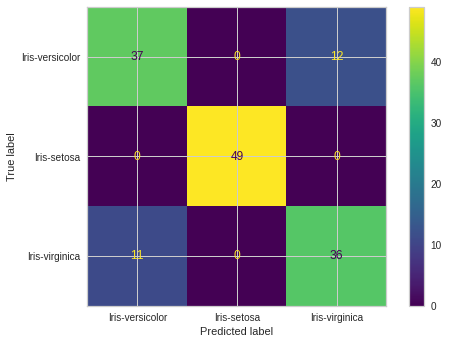

In [34]:
# Voy a usar de nuevo KMeans pero descartando los datos anómalos

km2 = KMeans(init = 'k-means++'
            , n_clusters=nclusters
            , max_iter=500
            , n_init=10
            , random_state=seed)

y_pred_km2 = km2.fit_predict(X_scaled[finalDf.outlier == 0])
inliersDf = finalDf[finalDf.outlier == 0]
inliersDf["KMeans+Inliers"] = y_pred_km2

target_to_num_mapping_km2 = inliersDf.groupby("target").agg(pd.Series.mode).to_dict()['KMeans+Inliers']
print("Target to numeric mapping (KMeans+Inliers):", target_to_num_mapping_ag)

y_inliers = y[finalDf.outlier == 0]
y_true_km2 = y_inliers.map(target_to_num_mapping_km2).to_numpy()
print("y_true_km2:", y_true_km2.shape)
print("y_pred_km2:", y_pred_km2.shape)


print("Accuracy:", accuracy_score(y_true=y_true_km2, y_pred=y_pred_km2))

labels_km2 = [k for k,v in sorted(target_to_num_mapping_km2.items(), key=lambda x: x[1])]

cm_km2 = ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_true_km2, y_pred=y_pred_km2),
    display_labels=labels_km2
)
cm_km2.plot()
plt.show()

Eliminando anomalías sólo hemos mejorado el accuracy en un 1%, por lo que no podemos decir que las diferencias entre el agrupamiento y el etiquetado se explique por anomalías en los datos.

Para explicar esta diferencia deberíamos buscar otras explicaciones. Dejo aquí dos hipótesis



*   Que exista alguna otra característica relevante no presente en el dataset
*   Que se hayan cometido errores humanos en el etiquetado de los datos

